## Atlas Interactivo de Emisiones en Chile (2019-2023)

**Autor: Ricardo Urdaneta** 

---

#### Resumen
Este proyecto consiste en el desarrollo de un análisis de datos end-to-end, desde la limpieza y procesamiento de datos crudos hasta el despliegue de un dashboard web interactivo. El objetivo es visualizar y analizar las emisiones al aire de fuentes difusas en Chile entre los años 2019 y 2023, permitiendo a los usuarios explorar tendencias temporales, distribuciones geográficas y el impacto de diferentes fuentes contaminantes a nivel nacional, regional y comunal.


#### Fuente de Datos
Los datos utilizados provienen del Registro de Emisiones y Transferencia de Contaminantes (RETC) del Ministerio del Medio Ambiente de Chile. Se consolidaron los datasets anuales desde 2019 hasta 2023.

* **Tipo de Emisiones:** Fuentes Difusas.

* **Fuentes Incluidas:** Quemas agrícolas, incendios forestales, incendios urbanos y combustión de leña residencial.

* **Granularidad:** Nivel comunal, provincial y regional.

**Imporante constatar que los datasets no contienen información de emisiones industriales ni de transporte**.


#### Metodología y Fases del Proyecto
El proyecto se estructura de la siguiente manera:

* **1. Carga y Consolidación:** Se cargaron los 5 archivos CSV correspondientes a cada año y se unieron en un único DataFrame para un análisis cohesivo. Se implementaron validaciones para asegurar la consistencia de los datos.

* **2. Limpieza y Preprocesamiento:** Se realizaron tareas de limpieza críticas, como la estandarización de nombres de columnas, corrección de tipos de datos (de texto a numérico), y el manejo de valores nulos. También se simplificaron los nombres de las regiones para mejorar la legibilidad en las visualizaciones.

* **3. Análisis Exploratorio de Datos (EDA):** Se investigaron los datos para descubrir patrones e insights iniciales. Se identificaron las principales fuentes de emisión, los contaminantes más comunes y las regiones con mayores niveles de polución. Un hallazgo clave fue la detección de un pico anómalo de emisiones en 2023, correlacionado directamente con los mega-incendios forestales de ese año.

* **4. Desarrollo del Dashboard Interactivo:** Se utilizó la librería Streamlit para construir una aplicación web. Las características principales incluyen:

        Filtros interactivos por año, región, fuente y contaminante.

        Un mapa coroplético de Chile para visualizar la distribución geográfica de las emisiones.

        Gráficos dinámicos que se actualizan según la selección del usuario.

        Organización del contenido en pestañas para una navegación intuitiva.

* **5. Despliegue:** La aplicación final fue desplegada en Streamlit Community Cloud, generando un enlace público para su acceso y demostración.

---

In [1]:
# Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Librerías para manejo de archivos y directorios
import os

# Librerías para manejo de imágenes
import os
from IPython.display import Image

# Librerías para manejo de advertencias
import warnings 
warnings.filterwarnings('ignore')

# Manipulación de archivos Jupyter Notebook
import nbformat

# Configuraciones adicionales para mejorar la visualización
# Configura el estilo de los gráficos de Seaborn
sns.set_theme(style="whitegrid")

# Ajusta el número máximo de filas y columnas a mostrar en Pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

print("Librerías cargadas exitosamente.")

Librerías cargadas exitosamente.


In [2]:
# Carga inicial de archivos CSV
data_path = './data/'
file_names = ['2019.csv', '2020.csv', '2021.csv', '2022.csv', '2023.csv']

print("Cargando archivos...")
# Cargamos todo en una lista de DataFrames
try:
    lista_de_dataframes = [pd.read_csv(os.path.join(data_path, file), sep=';') for file in file_names]
    print(f"✅ Se cargaron {len(lista_de_dataframes)} archivos.")
except Exception as e:
    print(f"Error durante la carga de archivos: {e}")
    lista_de_dataframes = [] # Dejamos la lista vacía para no continuar

# Validación automática de consistencia de columnas
if lista_de_dataframes:
    print("\n--- Validando consistencia de columnas ---")
    
    # Tomamos las columnas del primer archivo como la referencia
    columnas_referencia = lista_de_dataframes[0].columns
    
    # Comparamos las columnas de los demás archivos con la referencia
    for i, df in enumerate(lista_de_dataframes[1:]):
        # El método .equals() verifica que los nombres y el orden sean idénticos
        if not df.columns.equals(columnas_referencia):
            print(f"Las columnas del archivo '{file_names[i+1]}' no coinciden con las de '{file_names[0]}'.")
            # Detenemos la ejecución para evitar errores
            raise ValueError("Los esquemas de los archivos no son iguales.")
            
    print("Todos los archivos tienen una estructura de columnas idéntica.")

# Consolidación si la validación es exitosa
if lista_de_dataframes:
    print("\n--- Consolidando DataFrames ---")
    df_total = pd.concat(lista_de_dataframes, ignore_index=True)
    
    print(f"El DataFrame total tiene {df_total.shape[0]} filas y {df_total.shape[1]} columnas.")
    print("\nPrimeras 5 filas del DataFrame consolidado:")
    display(df_total.head())

Cargando archivos...
✅ Se cargaron 5 archivos.

--- Validando consistencia de columnas ---
Todos los archivos tienen una estructura de columnas idéntica.

--- Consolidando DataFrames ---
El DataFrame total tiene 3501784 filas y 12 columnas.

Primeras 5 filas del DataFrame consolidado:


,tipo_fuente,id_tipo_fuente,contaminantes,id_contaminantes,año,cantidad_toneladas,region,provincia,comuna,id_comuna,Lat,Lon
0,Combustión de Leña Residencial Urbana,27,Monóxido de carbono,73,2019,"202,7395865",Araucanía,Cautín,Temuco,9101,NaN,NaN
1,Combustión de Leña Residencial Urbana,27,Compuestos Orgánicos Volátiles,35,2019,"157,7534086",Araucanía,Cautín,Temuco,9101,NaN,NaN
2,Combustión de Leña Residencial Urbana,27,Material particulado,80,2019,"6,146931898",Araucanía,Cautín,Temuco,9101,NaN,NaN
3,Combustión de Leña Residencial Urbana,27,MP10,74,2019,"5,888760758",Araucanía,Cautín,Temuco,9101,NaN,NaN
4,Combustión de Leña Residencial Urbana,27,"MP2,5",122,2019,"5,723896842",Araucanía,Cautín,Temuco,9101,NaN,NaN


#### Inspección Inicial Detallada
Obtenemos una visión general de nuestro DataFrame consolidado para identificar problemas comunes como tipos de datos incorrectos o valores faltantes.

In [3]:
# Inspección Inicial Detallada
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501784 entries, 0 to 3501783
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   tipo_fuente         object
 1   id_tipo_fuente      int64 
 2   contaminantes       object
 3   id_contaminantes    int64 
 4   año                 int64 
 5   cantidad_toneladas  object
 6   region              object
 7   provincia           object
 8   comuna              object
 9   id_comuna           int64 
 10  Lat                 object
 11  Lon                 object
dtypes: int64(4), object(8)
memory usage: 320.6+ MB


Las columnas `cantidad_toneladas`, `Lat` y `Lon` son tipo object cuando deberían ser numéricas.

In [4]:
# Muestra valores nulos por columna
df_total.isnull().sum()

tipo_fuente                 0
id_tipo_fuente              0
contaminantes               0
id_contaminantes            0
año                         0
cantidad_toneladas          0
region                      0
provincia                   0
comuna                      0
id_comuna                   0
Lat                   2754620
Lon                   2754620
dtype: int64

Las columnas Lat y Lon tienen una cantidad masiva de valores nulos (más de 2.7 millones). Esto significa que no podremos mapear cada emisión individualmente.

#### Limpieza 

* Estandarizaremos los nombres de las columnas.

* Corregiremos los tipos de datos de cantidad_toneladas, lat y lon.

In [5]:
# Estandarizar nombres de columnas
print("Estandarizando nombres de columnas...")
df_total.columns = (
    df_total.columns.str.lower()
    .str.replace(' ', '_', regex=False)
    .str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') # Elimina tildes
)

# Renombramos 'año' a 'ano' para evitar conflictos con carácteres especiales
if 'año' in df_total.columns:
    df_total.rename(columns={'año': 'ano'}, inplace=True)

print("Nuevos nombres:", df_total.columns.tolist())

Estandarizando nombres de columnas...
Nuevos nombres: ['tipo_fuente', 'id_tipo_fuente', 'contaminantes', 'id_contaminantes', 'ano', 'cantidad_toneladas', 'region', 'provincia', 'comuna', 'id_comuna', 'lat', 'lon']


In [6]:
# Corregir tipos de datos
columnas_a_convertir = ['cantidad_toneladas', 'lat', 'lon']

for col in columnas_a_convertir:
    # Reemplazar comas por puntos y convertir a numérico
    if df_total[col].dtype == 'object':
        df_total[col] = df_total[col].str.replace(',', '.', regex=False)
        df_total[col] = pd.to_numeric(df_total[col], errors='coerce')
    print(f"Columna '{col}' convertida a tipo numérico.")

# Verificación Final
df_total.info()

Columna 'cantidad_toneladas' convertida a tipo numérico.
Columna 'lat' convertida a tipo numérico.
Columna 'lon' convertida a tipo numérico.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501784 entries, 0 to 3501783
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   tipo_fuente         object 
 1   id_tipo_fuente      int64  
 2   contaminantes       object 
 3   id_contaminantes    int64  
 4   ano                 int64  
 5   cantidad_toneladas  float64
 6   region              object 
 7   provincia           object 
 8   comuna              object 
 9   id_comuna           int64  
 10  lat                 float64
 11  lon                 float64
dtypes: float64(3), int64(4), object(5)
memory usage: 320.6+ MB


## Renombrar las regiones
Simplificaremos los nombres de las regiones en la columna `region` para que las etiquetas en nuestros gráficos sean más claras, cortas y legibles.

In [7]:
# Muestra todos los nombres únicos en la columna 'region'
nombres_actuales = df_total['region'].unique()
print(nombres_actuales)

['Araucanía' 'Los Lagos' 'Aysén del Gral. Carlos Ibáñez del Campo'
 'Magallanes y de la Antártica Chilena' 'Los Ríos' 'Maule' 'Biobío'
 'Ñuble' 'Tarapacá' 'Antofagasta' 'Atacama' 'Coquimbo'
 "Libertador Gral. Bernardo O'Higgins" 'Arica y Parinacota'
 'Metropolitana' 'Valparaíso']


Crearemos un diccionario donde la clave es el nombre largo y el valor es el nombre corto que queremos para luego aplicar el reemplazo sobre el mismo.

In [8]:
# Definimos un diccionario para la búsqueda
# La clave es una palabra única del nombre largo y el valor es el nombre corto
mapeo_robusto = {
    'O\'Higgins': 'O\'Higgins',
    'Aysén': 'Aysén',
    'Magallanes': 'Magallanes',
    'Araucanía': 'La Araucanía',
    'Biobío': 'Biobío',
    'Ñuble': 'Ñuble',
    'Maule': 'Maule',
    'Metropolitana': 'Metropolitana',
    'Valparaíso': 'Valparaíso',
    'Los Ríos': 'Los Ríos',
    'Los Lagos': 'Los Lagos',
    'Atacama': 'Atacama',
    'Coquimbo': 'Coquimbo',
    'Antofagasta': 'Antofagasta',
    'Tarapacá': 'Tarapacá',
    'Arica y Parinacota': 'Arica'
}

# Iteramos sobre el diccionario y aplicamos el reemplazo
print("--- Aplicando mapeo de regiones ---")
for palabra_clave, nombre_corto in mapeo_robusto.items():
    # Usamos .loc y .str.contains() para encontrar y reemplazar
    # na=False es importante para ignorar valores nulos y evitar errores
    df_total.loc[df_total['region'].str.contains(palabra_clave, na=False), 'region'] = nombre_corto

# Verificamos
nombres_finales = df_total['region'].unique()
print(sorted(nombres_finales)) # Usamos sorted() para verlos en orden alfabético

--- Aplicando mapeo de regiones ---
['Antofagasta', 'Arica', 'Atacama', 'Aysén', 'Biobío', 'Coquimbo', 'La Araucanía', 'Los Lagos', 'Los Ríos', 'Magallanes', 'Maule', 'Metropolitana', "O'Higgins", 'Tarapacá', 'Valparaíso', 'Ñuble']


## Análisis exploratorio

## ¿Qué se emite y de dónde proviene?
Primero, entendamos la composición general de las emisiones.

#### 1. ¿Cuáles son las principales fuentes de emisión?
Vamos a cuantificar cuánto aporta cada tipo_fuente al total de emisiones en todo el período.

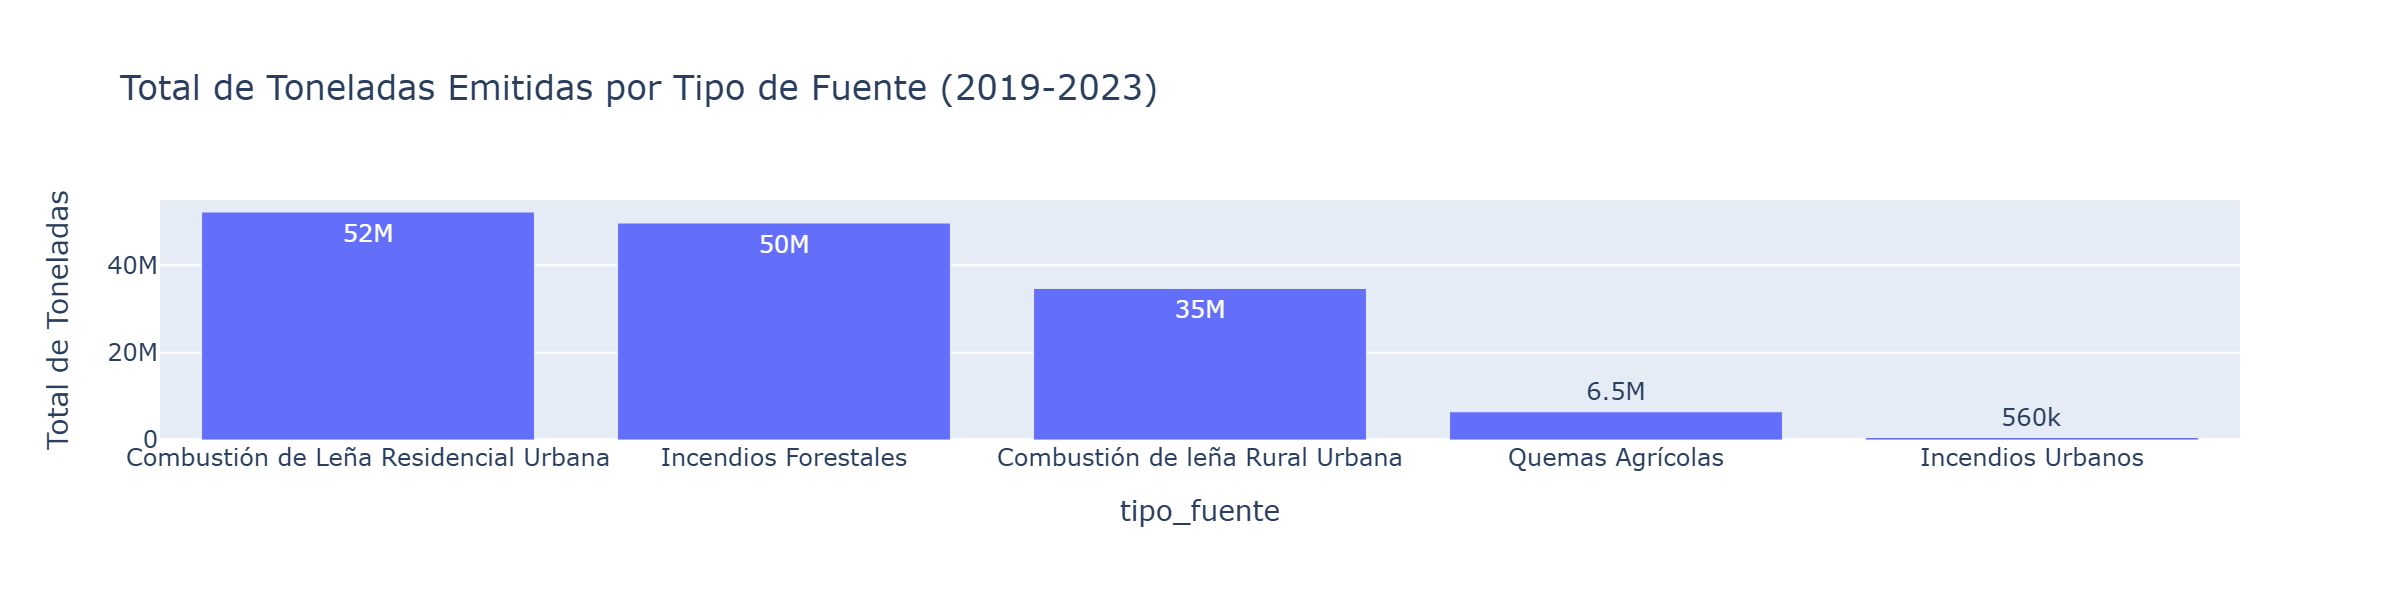

In [ ]:
# Agrupamos por tipo de fuente y sumamos las toneladas
emisiones_por_fuente = df_total.groupby('tipo_fuente')['cantidad_toneladas'].sum().sort_values(ascending=False)

# Creamos un gráfico de barras interactivo
fig_fuente = px.bar(
    emisiones_por_fuente,
    x=emisiones_por_fuente.index,
    y='cantidad_toneladas',
    title='Total de Toneladas Emitidas por Tipo de Fuente (2019-2023)',
    labels={'cantidad_toneladas': 'Total de Toneladas', 'x': 'Tipo de Fuente'},
    text_auto='.2s' # Formato para mostrar los valores en las barras
)

fig_fuente.show()

# Guarda la figura como imagen para mostrar en el notebook de Github 
fig_fuente.write_image("img/toneladas_emitidas_tipo_fuente.png", width=1200, height=300, scale=2)
Image(filename="img/toneladas_emitidas_tipo_fuente.png")


#### 2. ¿Cuáles son los contaminantes más emitidos?
Ahora, hacemos lo mismo pero para los tipos de contaminantes.

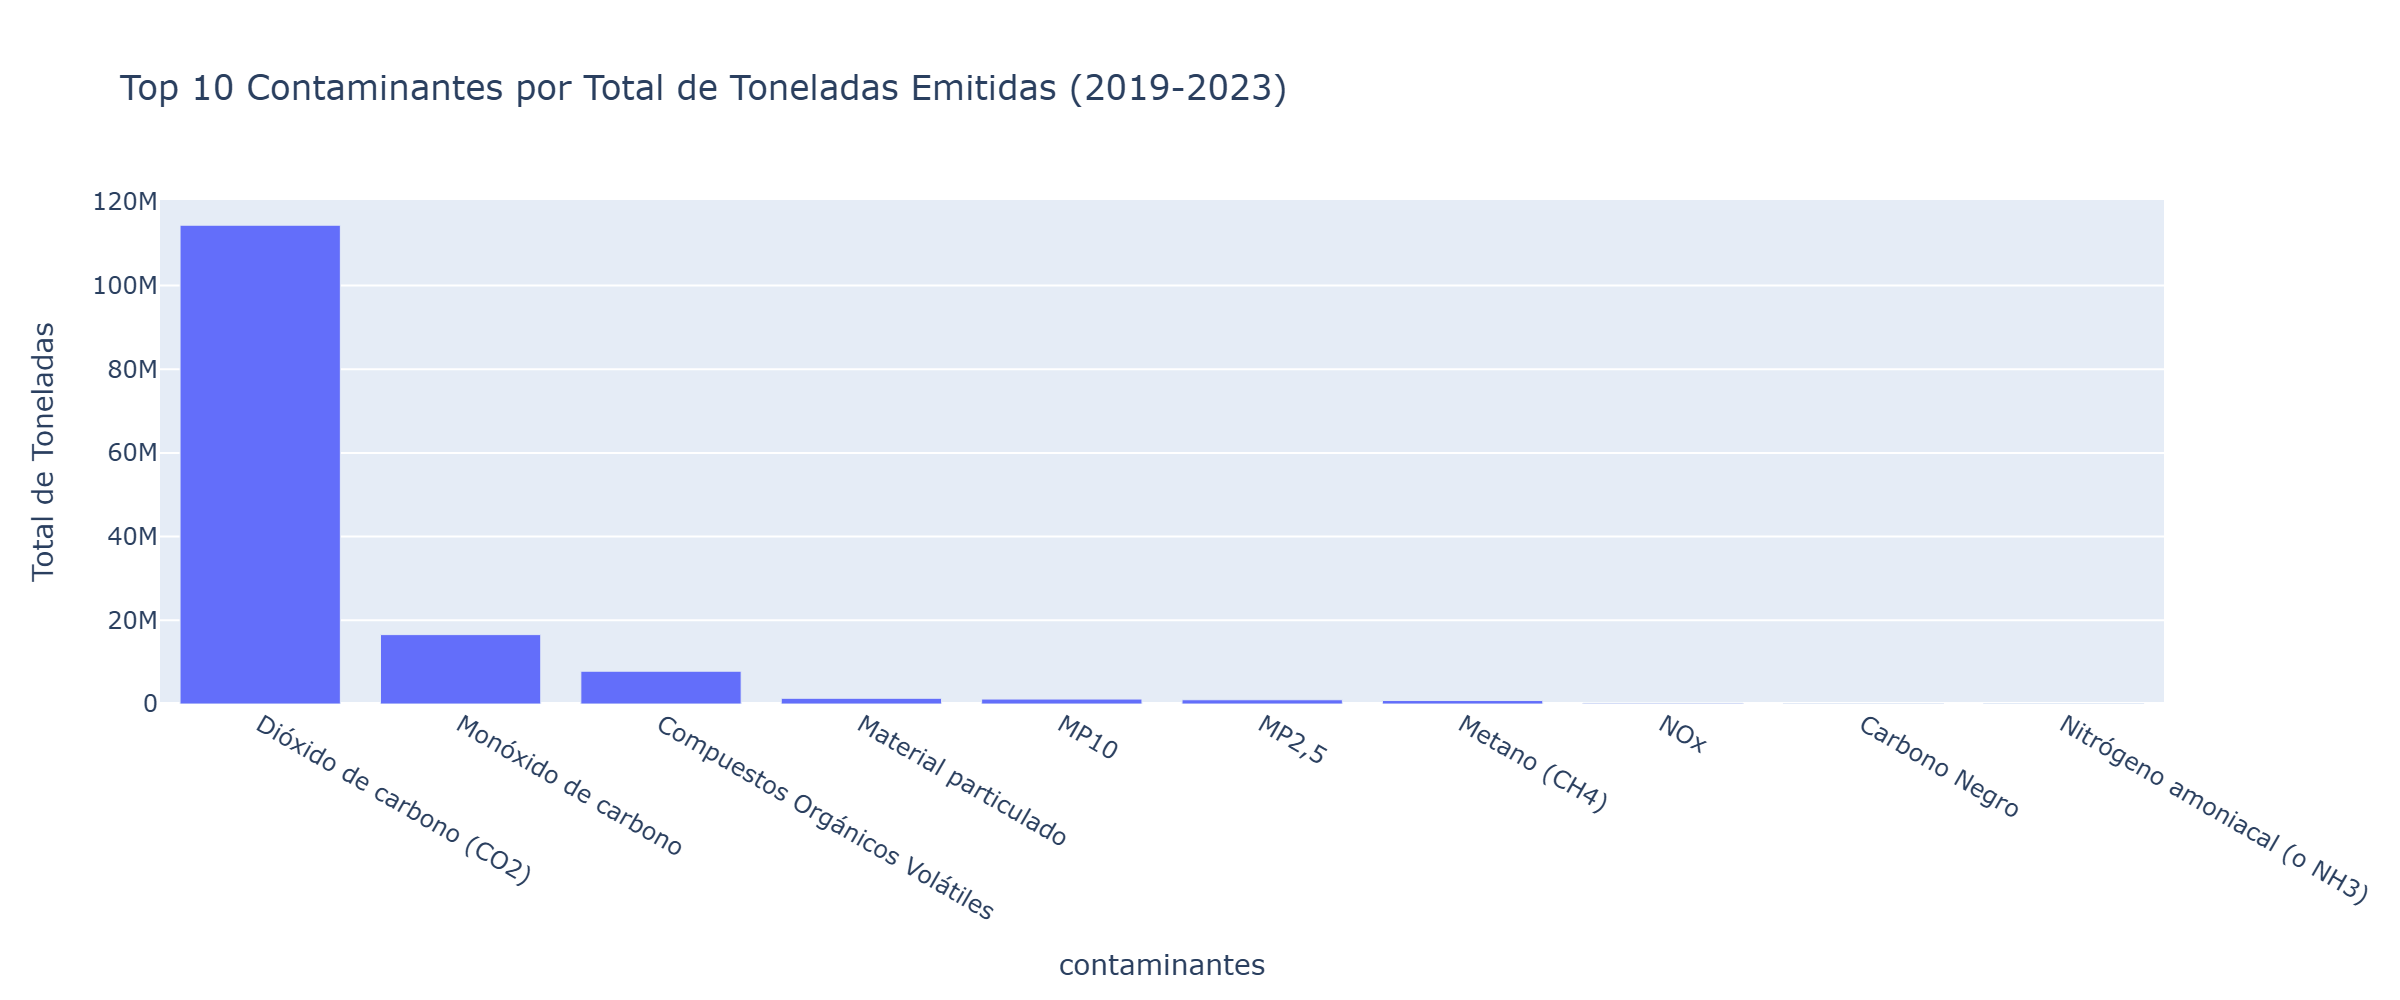

In [25]:
# Agrupamos por contaminante y sumamos
emisiones_por_contaminante = df_total.groupby('contaminantes')['cantidad_toneladas'].sum().nlargest(10)

# Creamos el gráfico
fig_contaminante = px.bar(
    emisiones_por_contaminante,
    x=emisiones_por_contaminante.index,
    y='cantidad_toneladas',
    title='Top 10 Contaminantes por Total de Toneladas Emitidas (2019-2023)',
    labels={'cantidad_toneladas': 'Total de Toneladas', 'x': 'Contaminante'}
)

fig_contaminante.show()

# Guarda la figura como imagen para mostrar en el notebook de Github 
fig_contaminante.write_image("img/total_contaminantes_emitidos.png", width=1200, height=500, scale=2)
Image(filename="img/total_contaminantes_emitidos.png")

## ¿Dónde se concentran las emisiones?
Identifiquemos las zonas geográficas con mayores niveles de emisión.


### 3. ¿Qué regiones emiten más?

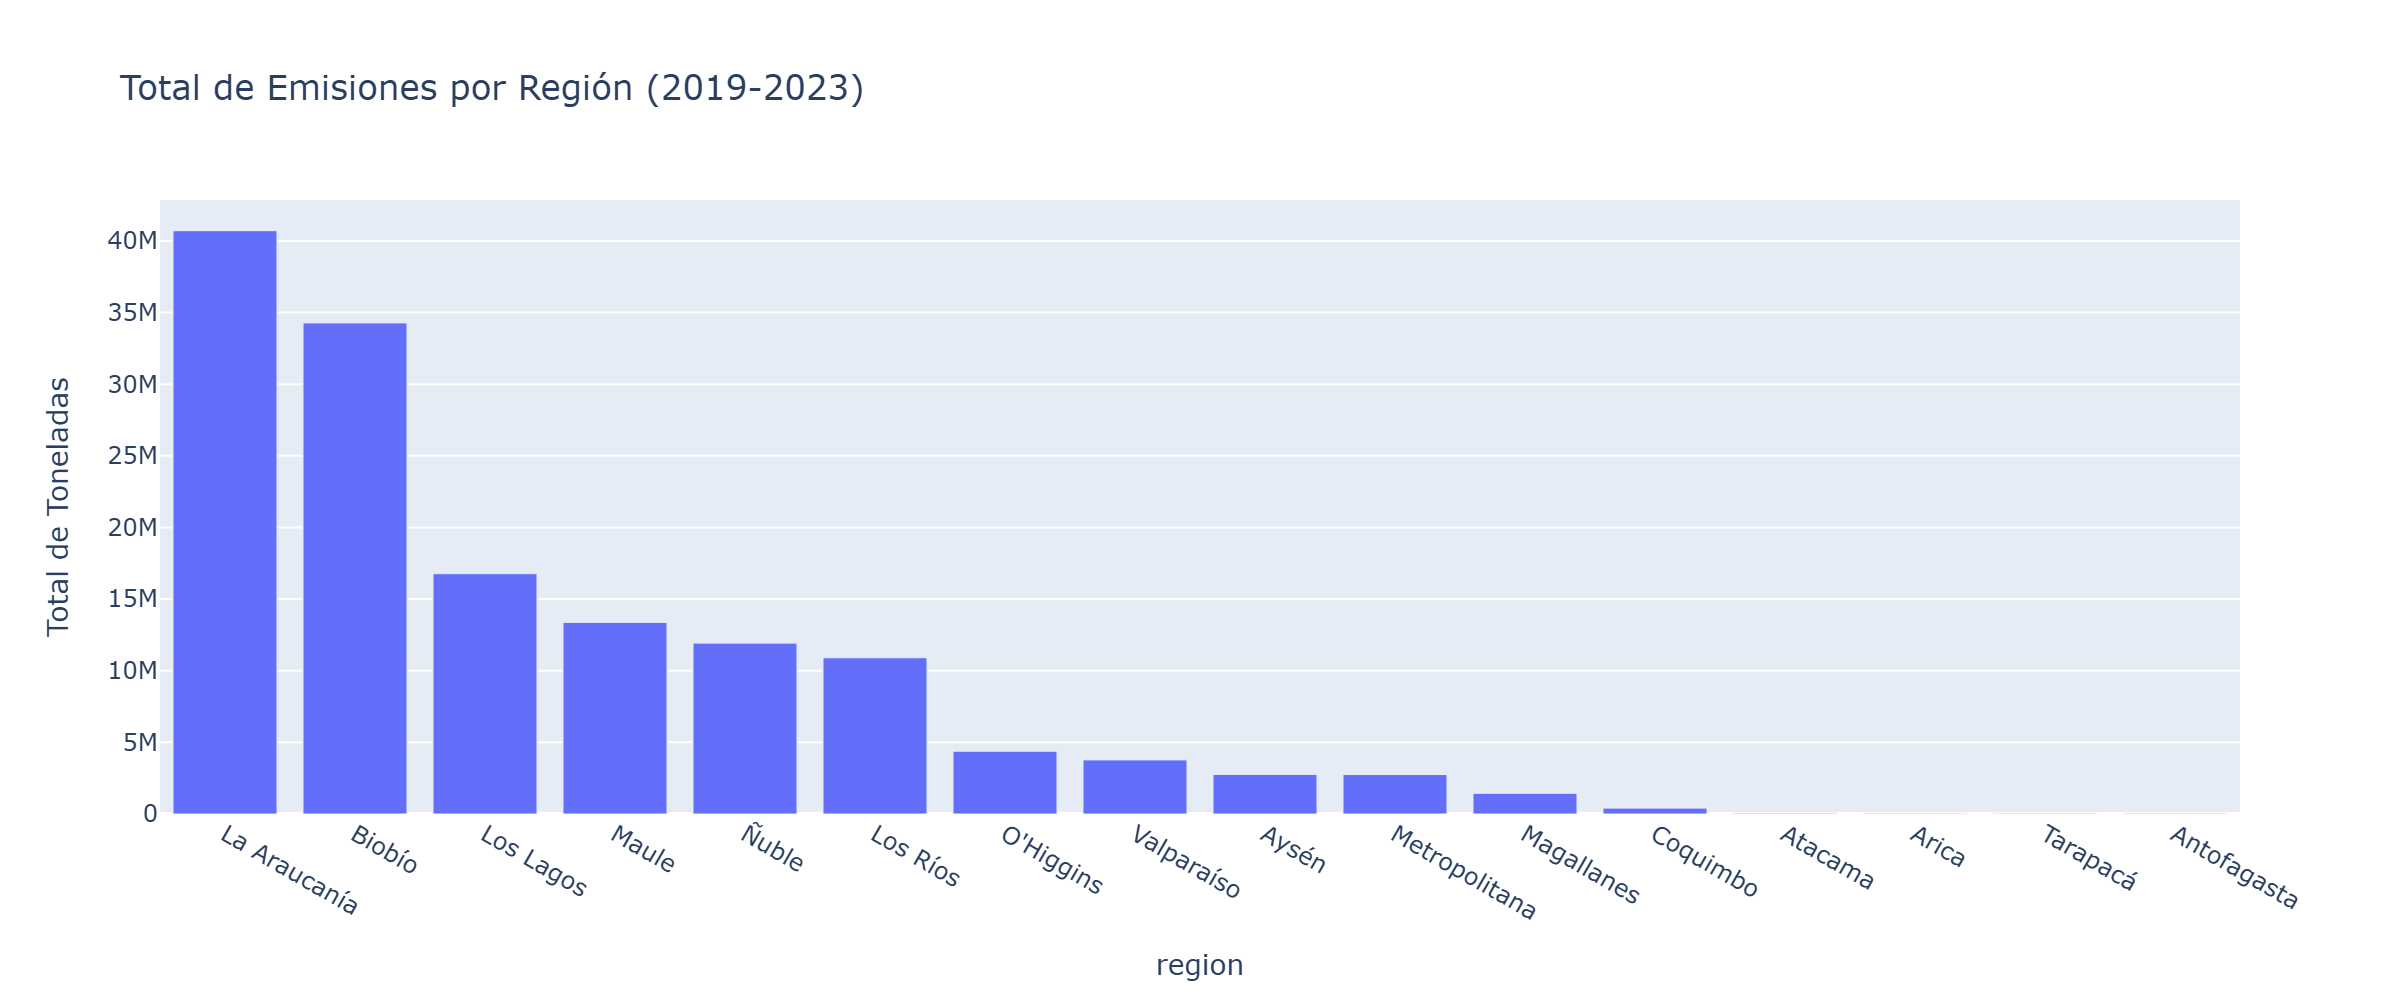

In [29]:
# Agrupamos por región
emisiones_por_region = df_total.groupby('region')['cantidad_toneladas'].sum().sort_values(ascending=False)

# Gráfico de barras
fig_region = px.bar(
    emisiones_por_region,
    x=emisiones_por_region.index,
    y='cantidad_toneladas',
    title='Total de Emisiones por Región (2019-2023)',
    labels={'cantidad_toneladas': 'Total de Toneladas', 'x': 'Región'}
)

fig_region.show()

# Guarda la figura como imagen para mostrar en el notebook de Github 
fig_region.write_image("img/total_emisiones_region.png", width=1200, height=500, scale=2)
Image(filename="img/total_emisiones_region.png")

## ¿Cuándo ocurren las emisiones?
Veamos cómo han cambiado las emisiones a lo largo del tiempo.

#### 4. ¿Cómo han evolucionado las emisiones año a año?
Este análisis nos mostrará la tendencia general.

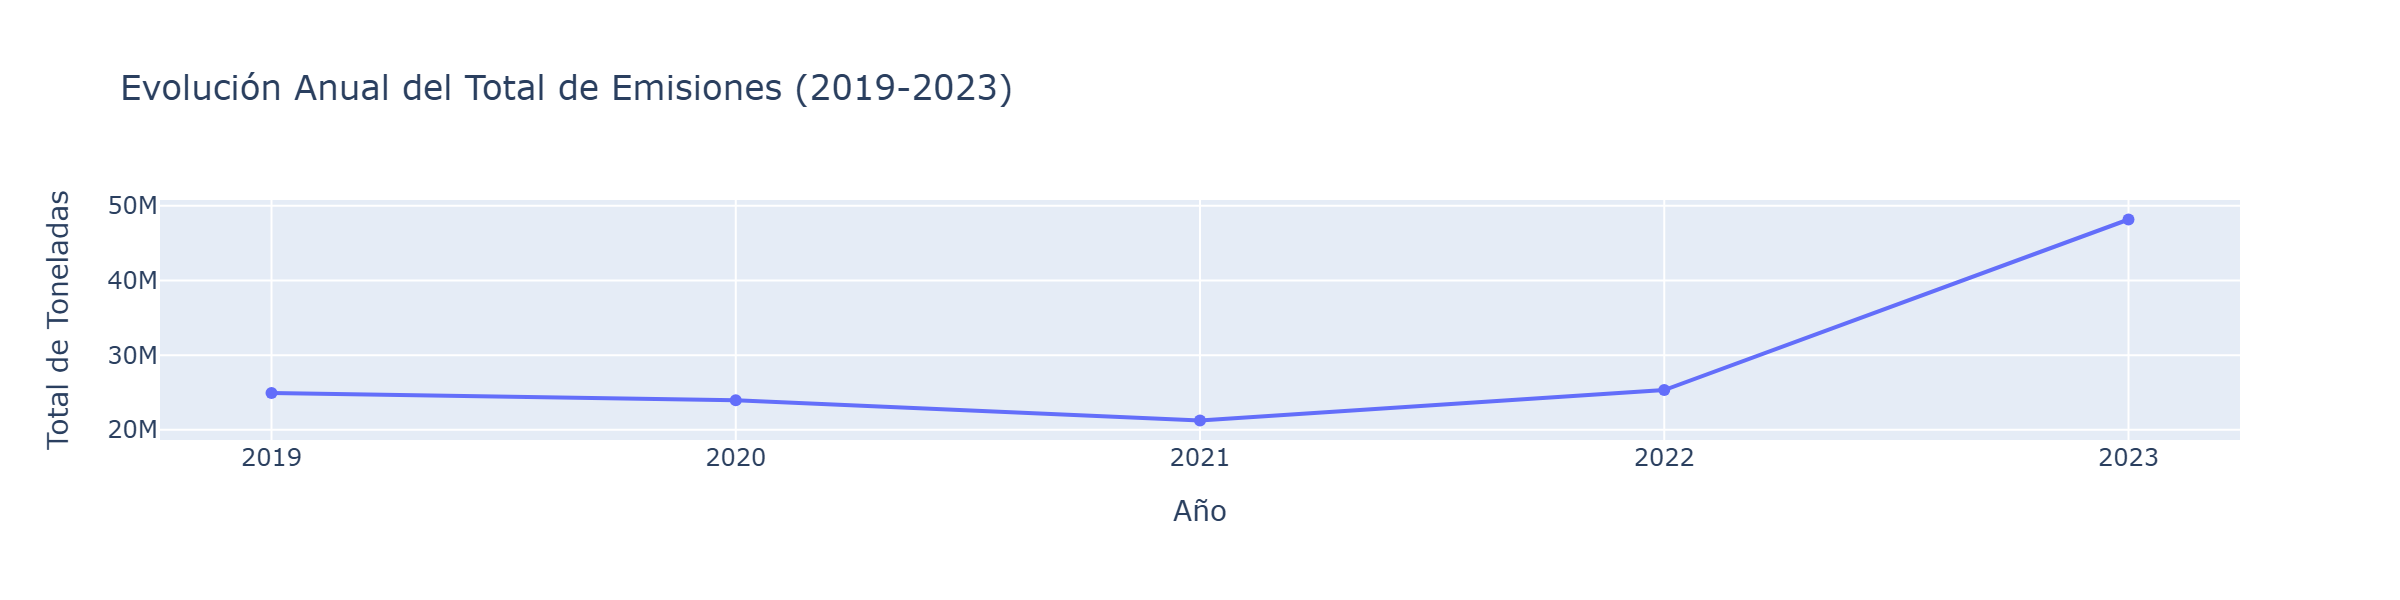

In [33]:
# Agrupamos por año
emisiones_por_ano = df_total.groupby('ano')['cantidad_toneladas'].sum()

# Gráfico de líneas para ver la tendencia
fig_ano = px.line(
    emisiones_por_ano,
    x=emisiones_por_ano.index,
    y='cantidad_toneladas',
    title='Evolución Anual del Total de Emisiones (2019-2023)',
    labels={'cantidad_toneladas': 'Total de Toneladas', 'ano': 'Año'},
    markers=True # Añade marcadores en cada punto de dato
)
# Aseguramos que los años se muestren como números enteros
fig_ano.update_xaxes(dtick=1)

fig_ano.show()

# Guarda la figura como imagen para mostrar en el notebook de Github 
fig_ano.write_image("img/evolucion_anual__emisiones.png", width=1200, height=300, scale=2)
Image(filename="img/evolucion_anual__emisiones.png")

#### 5. ¿Podemos inferir la estacionalidad a través de las fuentes?
Dado que no tenemos datos mensuales, no podemos ver directamente los datos de de invierno o verano. Sin embargo, podemos graficar la evolución anual de las fuentes por separado. Podriamos esperar que Combustión de leña sea una variable importante del invierno e Incendios forestales del verano.

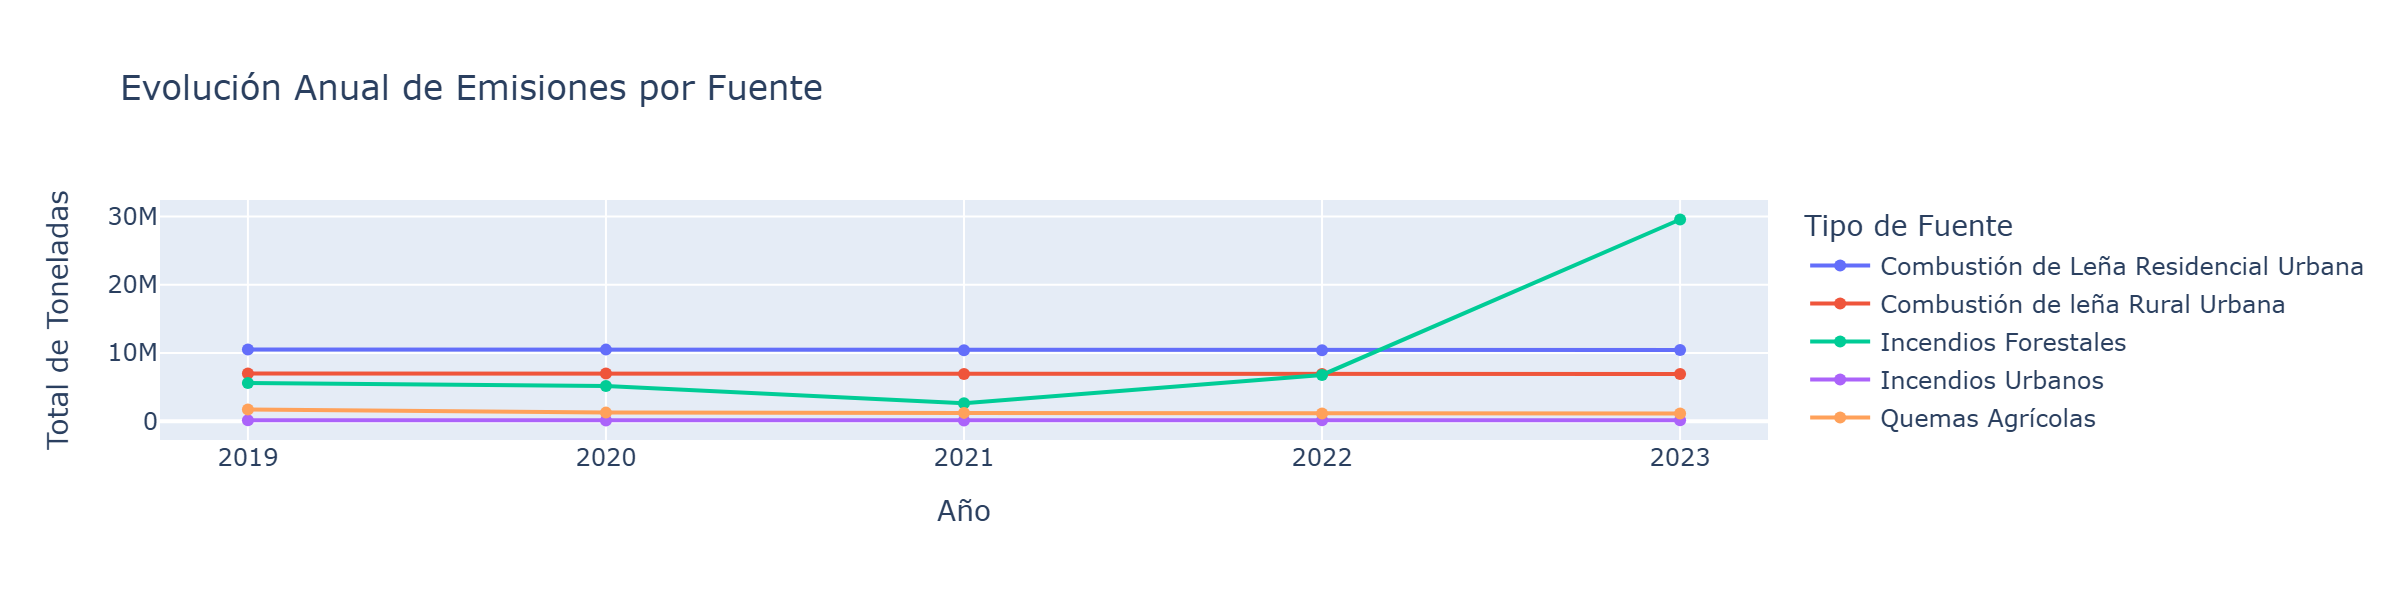

In [34]:
# Agrupamos por año y tipo de fuente
emisiones_anual_fuente = df_total.groupby(['ano', 'tipo_fuente'])['cantidad_toneladas'].sum().reset_index()

# Gráfico de líneas con un color para cada fuente
fig_estacional = px.line(
    emisiones_anual_fuente,
    x='ano',
    y='cantidad_toneladas',
    color='tipo_fuente', # Magia aquí: una línea por cada tipo de fuente
    title='Evolución Anual de Emisiones por Fuente',
    labels={'cantidad_toneladas': 'Total de Toneladas', 'ano': 'Año', 'tipo_fuente': 'Tipo de Fuente'},
    markers=True
)

fig_estacional.update_xaxes(dtick=1)
fig_estacional.show()

# Guarda la figura como imagen para mostrar en el notebook de Github 
fig_estacional.write_image("img/evolucion_anual__emisiones_por_fuente.png", width=1200, height=300, scale=2)
Image(filename="img/evolucion_anual__emisiones_por_fuente.png")

El análisis exploratorio identificó un aumento drástico en las emisiones totales durante 2023, atribuible en su totalidad a un incremento sin precedentes en la categoría ['Incendios forestales'](https://es.wikipedia.org/wiki/Incendios_forestales_en_Chile_de_2023), lo que se corresponde con la histórica y devastadora ola de incendios que afectó al centro-sur del país a principios de ese año.

Calcularemos  las **emisiones totales para cada comuna**, lo que nos servirá para unirlo con el mapa.

In [14]:
# Agrupamos los datos por comuna y sumamos las toneladas
emisiones_por_comuna = df_total.groupby(['id_comuna', 'comuna', 'region'])['cantidad_toneladas'].sum().reset_index()

# Ordenamos para ver las comunas con más emisiones
emisiones_por_comuna_top = emisiones_por_comuna.sort_values('cantidad_toneladas', ascending=False)

print("Top 15 comunas con mayores emisiones totales (2019-2023):")
display(emisiones_por_comuna_top.head(15))

Top 15 comunas con mayores emisiones totales (2019-2023):


,id_comuna,comuna,region,cantidad_toneladas
165,8306,Nacimiento,Biobío,9.261739e+06
206,10101,Puerto Montt,Los Lagos,4.162176e+06
204,9210,Traiguén,La Araucanía,3.452264e+06
174,9101,Temuco,La Araucanía,3.353069e+06
160,8301,Los Angeles,Biobío,3.300167e+06
164,8305,Mulchén,Biobío,3.134333e+06
309,14101,Valdivia,Los Ríos,3.077848e+06
179,9106,Galvarino,La Araucanía,3.058751e+06
225,10301,Osorno,Los Lagos,2.952964e+06
127,7304,Molina,Maule,2.679442e+06


Calcularemos el **total de emisiones de MP2,5 por Leña en el Sur de Chile** para tambien unirlo con el mapa.

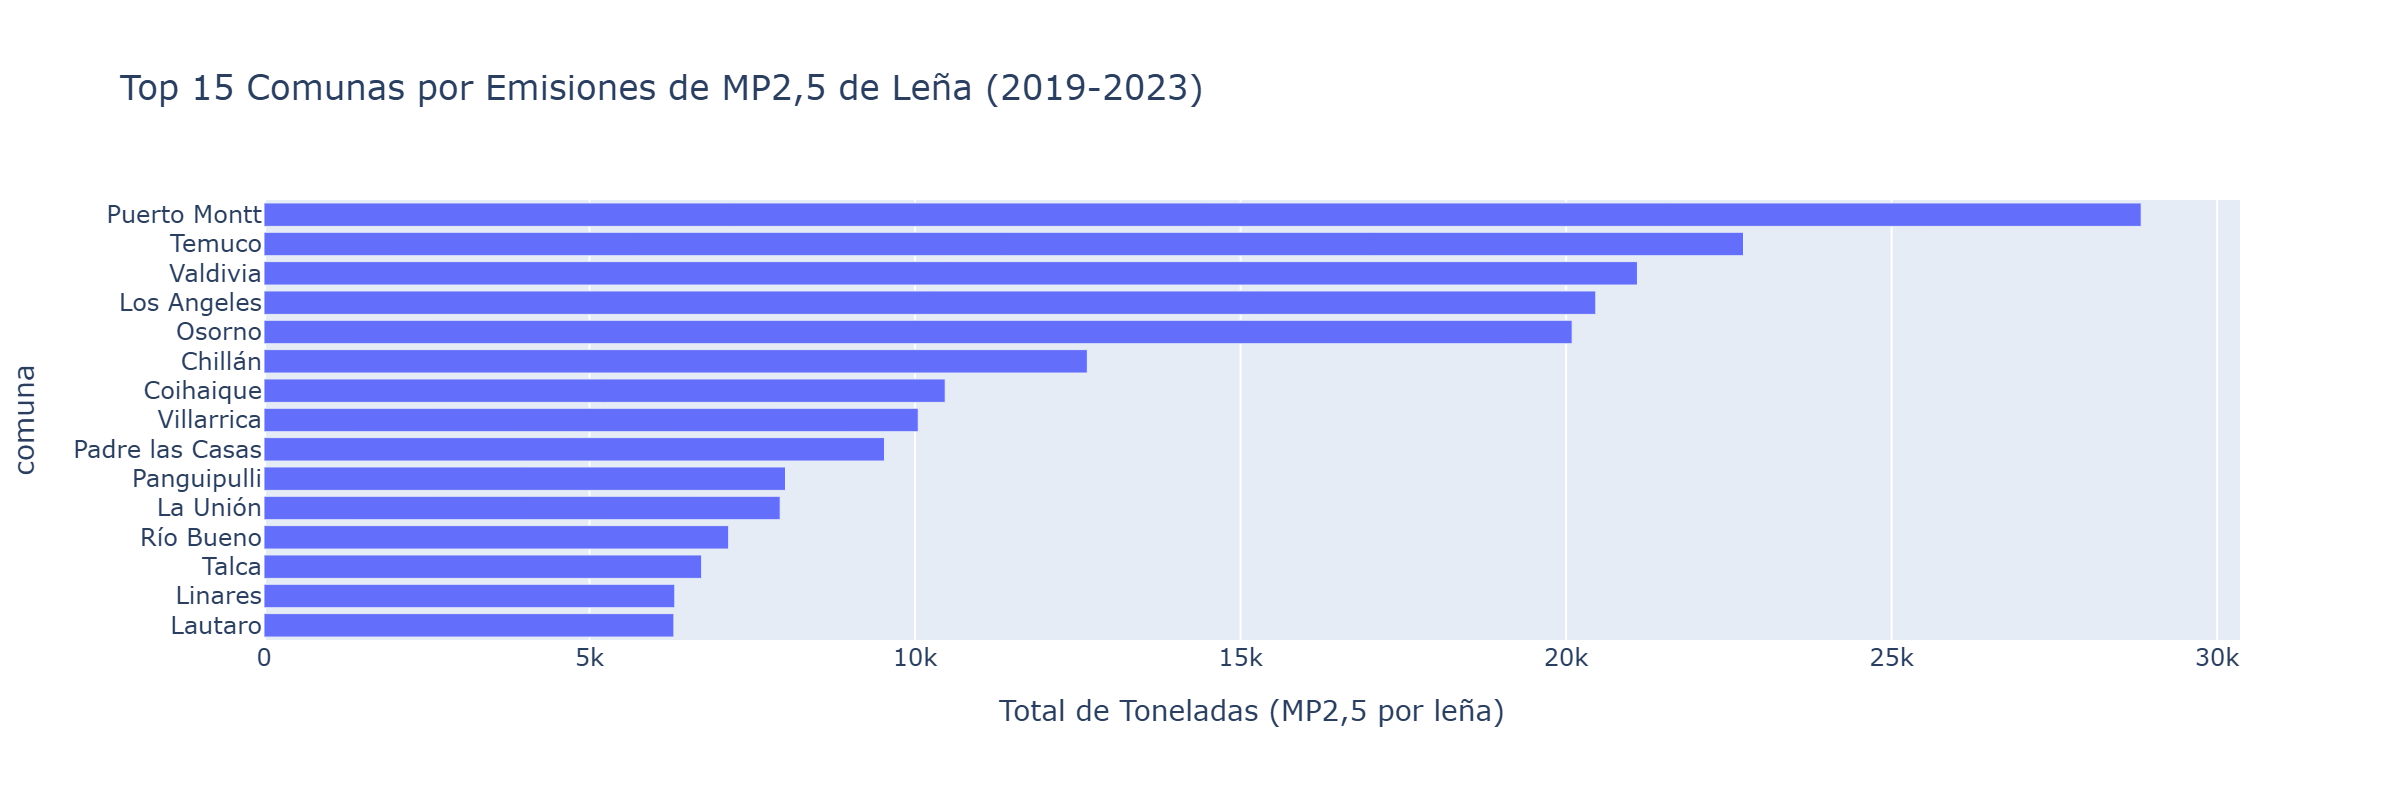

In [38]:
# 1. Filtramos por el problema específico
df_lena_mp25 = df_total[
    (df_total['contaminantes'] == 'MP2,5') &
    (df_total['tipo_fuente'].str.contains('leña', case=False))
].copy()

# 2. Agrupamos por comuna para encontrar los hotspots de este problema
hotspots_lena_mp25 = df_lena_mp25.groupby('comuna')['cantidad_toneladas'].sum().nlargest(15)

# 3. Visualizamos los resultados
fig_hotspots = px.bar(
    hotspots_lena_mp25,
    y=hotspots_lena_mp25.index,
    x='cantidad_toneladas',
    orientation='h',
    title='Top 15 Comunas por Emisiones de MP2,5 de Leña (2019-2023)',
    labels={'cantidad_toneladas': 'Total de Toneladas (MP2,5 por leña)', 'y': 'Comuna'}
)
fig_hotspots.update_layout(yaxis={'categoryorder':'total ascending'})
fig_hotspots.show()

# Guarda la figura como imagen para mostrar en el notebook de Github 
fig_hotspots.write_image("img/15_comunas_emisiones_mp25.png", width=1200, height=400, scale=2)
Image(filename="img/15_comunas_emisiones_mp25.png")

#### Guardamos dataframe para poder ejecutar el dashboard

In [16]:
# Definir la ruta de guardado
data_path = 'data'
file_name = 'emisiones_consolidadas_limpias.parquet'
ruta_guardado = os.path.join(data_path, file_name)

# Guardar el DataFrame
try:
    df_total.to_parquet(ruta_guardado)
    print(f"DataFrame guardado exitosamente en: {ruta_guardado}")
except Exception as e:
    print(f"Ocurrió un error al guardar el archivo: {e}")

DataFrame guardado exitosamente en: data\emisiones_consolidadas_limpias.parquet


## Construccion del Dashboard con Mapa Interactivo `'app.py'`

Crearemos un mapa coroplético, que colorea cada comuna según su nivel de emisiones. Para esto, necesitamos cosas:

* Un archivo GeoJSON con los límites geográficos de las comunas de Chile.

* Nuestros datos de emisiones, agregados por comuna presentes en este notebook.